## U13T9 Тестовое задание по блоку Python-13 визуализаци данных.  

**Исходные данные:** [Kaggle](https://www.kaggle.com/mathchi/churn-for-bank-customers)
об оттоке клиентов некоторого банка.

**Задача:** установить, чем ушедшие клиенты отличаются от лояльных и как между собой связаны различные признаки, определяющие клиентов.

**Условия выполнения задачи:**
1. Мини-отчет о проделанной работе представить в виде ноутбука
2. В файле должно содержаться 10 - графиков - 10 ответов к заданиям
3. Каждый график и преобразования к нему выполняются в отдельной ячейке
4. Под графиком представить ответ на вопрос по нему (если он требуется) и краткий вывод который можно сделать, исходя из графика.
5. Для визуализации можно использовать любую из библиотек (Pandas, Matplotlib, Seaborn, Plotly)
6. При выполнении заданий придерживаться критериев правильной визуализации

### Задания <a class="anchor" id=0></a>
- [9.1 Соотношение ушедших и лояльных клиентов.](#1)
- [9.2 Распределение баланса пользователей, у которых на счету больше 2 500 долларов.](#2)
- [9.3 Распределение баланса клиента в разрезе признака оттока клиентов.](#3)
- [9.4 Распределение возраста в разрезе признака оттока клиентов. ](#4)
- [9.5 Взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты.](#5)
- [9.6 Генденое распределение в разрезе признака оттока клиентов.](#6)
- [9.7 Распределение от числа приобретённых у банка услуг.](#7)
- [9.8 Влияние статуса активного клиента на признак оттока клиентов.](#8)
- [9.9 Географическое распределение ушедших клиентов.](#9)
- [9.10 Влияние категории кредитного рейтинга](#10)

### Столбцы таблицы:

- `RowNumber` (лишний признак - на удаление) — номер строки таблиц
- `CustomerId` (категориальный) — идентификатор клиента
- `Surname` (категориальный) — фамилия клиента
- `CreditScore` (числовой) — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)
- `Geography` (категориальный) — страна клиента (банк международный)
- `Gender` (категориальный) — пол клиента
- `Age` (категориальный) — возраст клиента
- `Tenure` (категориальный) — сколько лет клиент пользуется услугами банка
- `Balance` (числовой) — баланс на счетах клиента в банке
- `NumOfProducts` (категориальный) — количество услуг банка, которые приобрёл клиент
- `HasCrCard` (категориальный) — есть ли у клиента кредитная карта (1 — да, 0 — нет)
- `IsActiveMember` (категориальный) — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)
- `EstimatedSalary` (числовой) — предполагаемая заработная плата клиента
- `Exited` (категориальный) — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)

In [1]:
# Импорт необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# Чтение файла с данными
churn_data = pd.read_csv('C:/Личные документы/Python/Py/p_13_visualization_test/churn.csv')
# Удаление лишнего признака
churn_data = churn_data.drop('RowNumber', axis=1)
# Добавление признака лояльности
churn_data['Status'] = churn_data['Exited'].apply(lambda x: 'Лояльные' if x == 0 else 'Ушедшие')
churn_data

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Status
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Ушедшие
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Лояльные
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Ушедшие
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Лояльные
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Лояльные
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,Лояльные
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,Лояльные
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,Ушедшие
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,Ушедшие


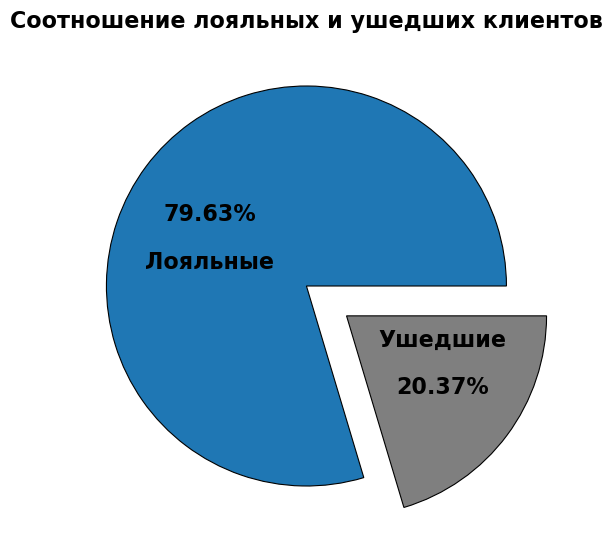

In [2]:
# 9.1 Каково соотношение ушедших и лояльных клиентов? 
# Покажите это на графике и дайте комментарий по соотношению.
pie_df = churn_data.groupby(by='Exited')['CustomerId'].count()
# Для корректного отображения фона в тёмной теме VS Code
plt.style.use('default')
# Задаём фигуру и оси 
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([1, 1, 1, 1])
# Задаём заголовок
axes.set_title('Соотношение лояльных и ушедших клиентов', fontweight='bold', fontsize=16)
# Строим график
axes.pie(
    pie_df,
    labels=('Лояльные','Ушедшие'),
    colors=('tab:blue','C7'),
    autopct='%.2f%%',
    explode=(0, 0.25),
    labeldistance=0.2,
    wedgeprops={'lw':0.8,'edgecolor':'k'},
    textprops={'fontweight':'semibold', 'fontsize':16}
);

<a class="anchor" id=1></a>
Из графика можно сделать вывод, что: 
- Соотношение лояльных и ушедших клиентов составляет 5 к 1.
- Из банка уходит каждый 5ый клиент.
- На данный момент доля ушедших клиентов составляет чуть более 20%.

[к заданиям](#0)

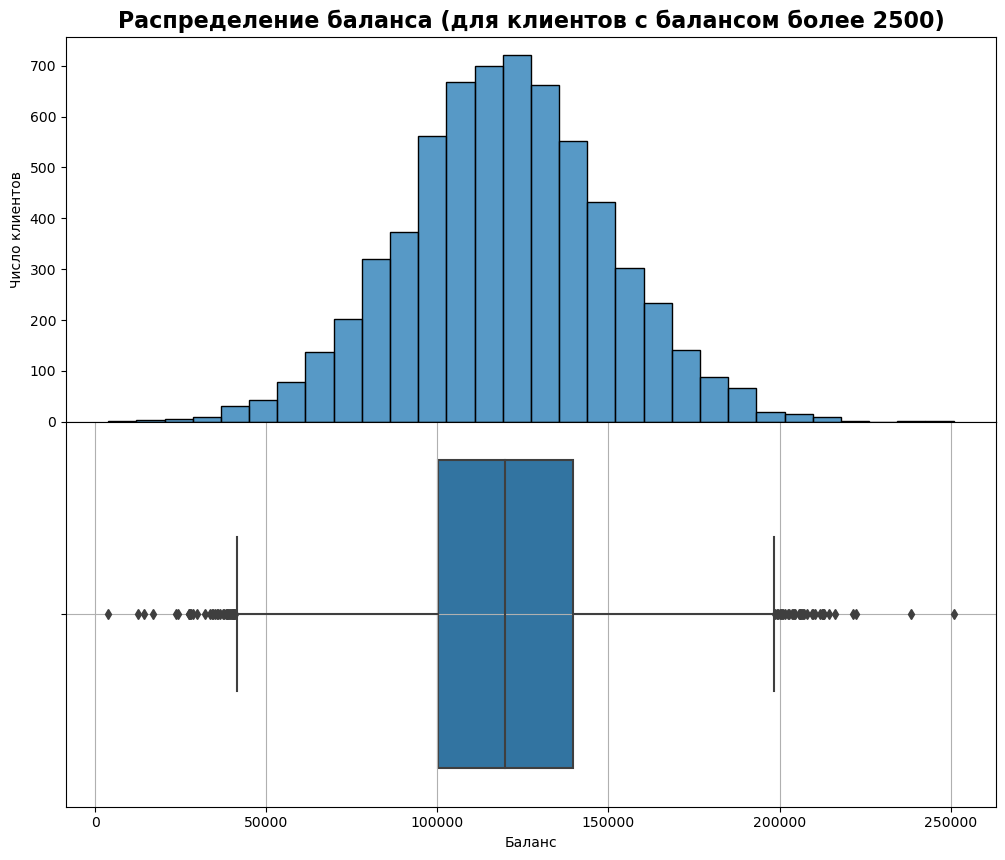

In [3]:
# 9.2 Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. 
# Опишите распределение и сделайте выводы.
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))
plt.subplots_adjust(hspace=.0)

histplot = sns.histplot(
    data=churn_data[churn_data['Balance'] >= 2500], 
    x='Balance', 
    bins=30,
    ax=axes[0],
    palette='tab10',
)
histplot.set_title('Распределение баланса (для клиентов с балансом более 2500)', fontweight='semibold', fontsize=16)
histplot.set_ylabel('Число клиентов')
boxplot = sns.boxplot(
    data=churn_data[churn_data['Balance'] >= 2500],
    x='Balance',
    orient='h',
    palette='tab10',
)
boxplot.set_xlabel('Баланс')
boxplot.set_ylabel(' ')
boxplot.grid()

<a class="anchor" id=2></a>
Из графика можно сделать вывод, что: 
- Распределение баланса клиентов имеет форму нормального распределения.
- Основная часть клиентов имеет баланс в интервале от 100000 до 140000.
- Медианное значение баланса 120000.
- Клиентская база по балансу однородна, количество клиентов плавно растёт с увеличение баланса и так же плавно спадает при прохождении медианного значения.

*Все выводы приведены для клиентов с положительным балансом не менее 2500 единиц в которых указан баланс

[к заданиям](#0)

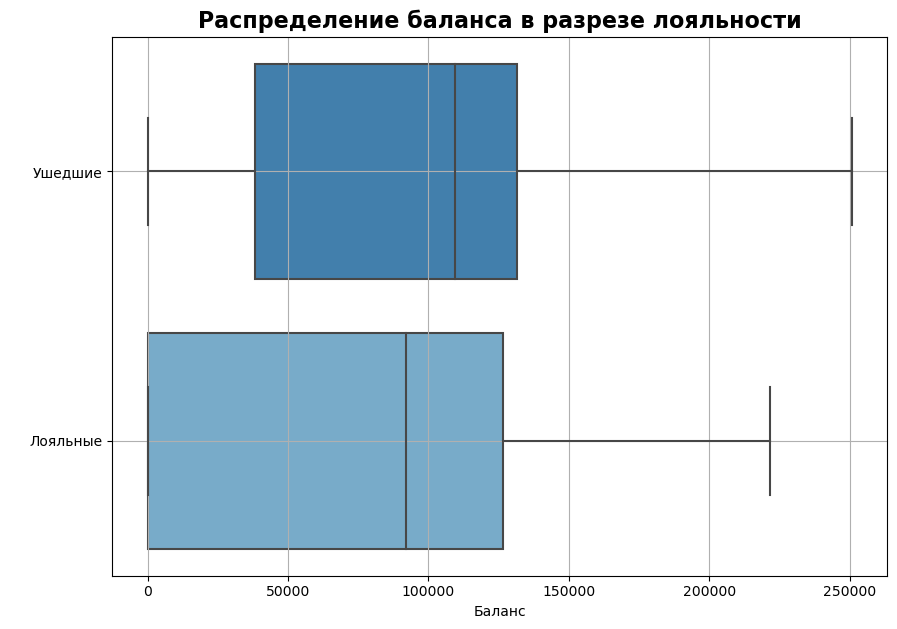

In [4]:
# 9.3 Посмотрите на распределение баланса клиента в разрезе признака оттока. 
# Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? 
# Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.
df = churn_data[['Exited','Balance','Status']]
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=df,
    y='Status',
    x='Balance',
    orient='h',
    palette='tab20c',

)
boxplot.set_title('Распределение баланса в разрезе лояльности', fontweight='semibold', fontsize=16)
boxplot.set_xlabel('Баланс')
boxplot.set_ylabel(' ')
boxplot.grid()

<a class="anchor" id=3></a>
Из графика можно сделать вывод, что: 
- Большинство **ушедших** клиентов держали на балансе суммы **от 40000 до 130000**, что несколько больше сумм у лояльных клиентов.
- Большое количество лояльных клиентов имеют **баланс равный 0**, нужно углубится в данные по активности этих клиентов, возможно они не пользуются услугами банка, а имеют пустой открытый счет.
- **Медианное значение** баланса ушедших клиентов также больше аналогичного значения для лояльных клиентов.

Исходя из вышеперечисленного можно предположить, что рассматриваемый банк не так удобен и привлекателен **для более состоятельных клиентов.** Уходят же эти клиенты ни в пустоту, а к конкурентам, у которых возможно интереснее программы лояльностей, плюшки и фишки.

[к заданиям](#0)

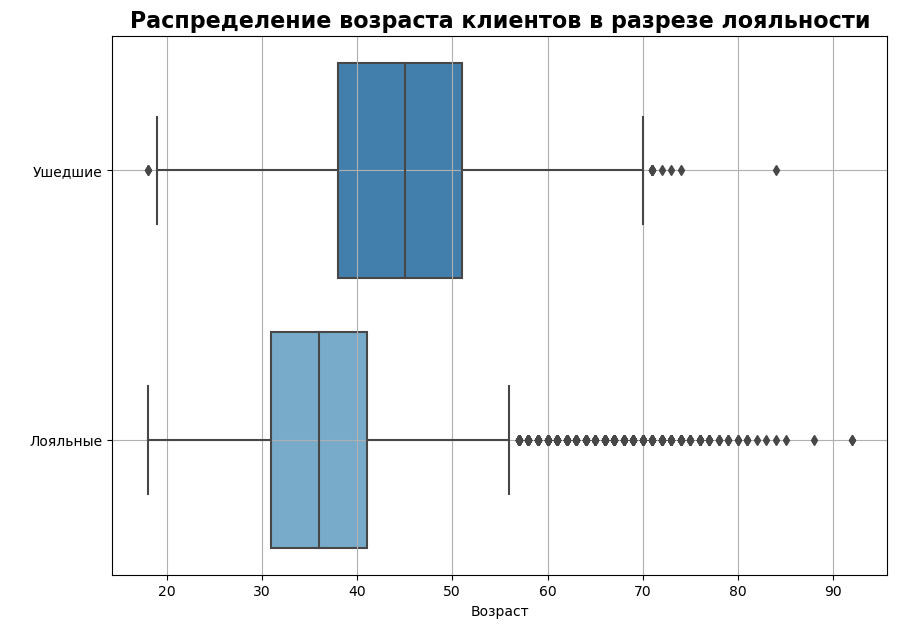

In [5]:
# 9.4 Посмотрите на распределение возраста в разрезе признака оттока. 
# В какой группе больше потенциальных выбросов? 
# На какую возрастную категорию клиентов стоит обратить внимание банку?
age_df = churn_data[['Exited','Age','Status']]
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=age_df,
    y='Status',
    x='Age',
    orient='h',
    palette='tab20c',

)
boxplot.set_title('Распределение возраста клиентов в разрезе лояльности', fontweight='semibold', fontsize=16)
boxplot.set_xlabel('Возраст')
boxplot.set_ylabel(' ')
boxplot.grid()

<a class="anchor" id=4></a>
Из графика можно сделать вывод, что: 
- Большинство **ушедших** клиентов находятся в возрастном диапазоне **от 38 до 51**.
- Большинство **лояльных** клиентов находятся в возрастном диапазоне **от 31 до 41**. 
- Медианные значения возраста и лояльных, и ушедших клиентов практически равны средним значениям, что указывает на равномерное распределение возрастов в обеих группах клиентов.
- Потенциальных выбросов по возрасту больше в группе лояльных клиентов.

Исходя из вышеперечисленного можно предположить, что рассматриваемый банк не так удобен и привлекателен **для более возрастных клиентов.** Большинство лояльных клиентов заметно моложе большинства уходящих. Банку определённо стоит обратить внимание на работу (привлечение, удержание) с клиентами возрастной группы 40 - 50.

По совокупности данных из 2х последних графиков, можно сделать вывод: **банк теряет состоятельных клиентов 40+.**



[к заданиям](#0)

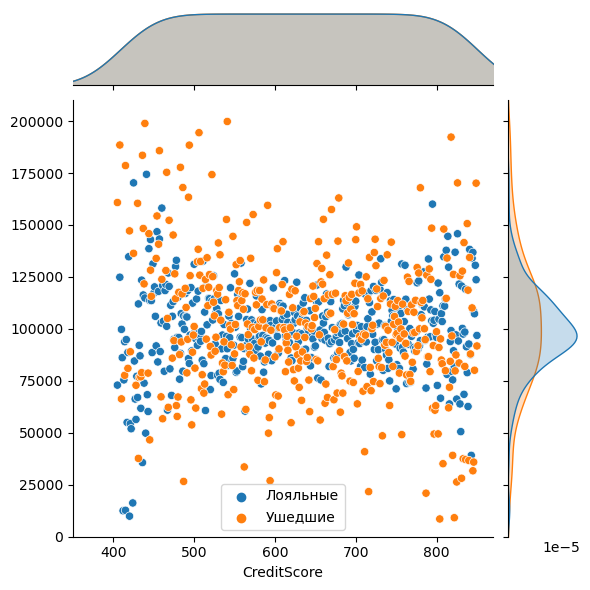

In [6]:
# 9.5 Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. 
# Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? 
# Если не видите явной взаимосвязи, укажите это.

scatter_loyal = churn_data[churn_data['Exited'] == 0].groupby('CreditScore')[['EstimatedSalary']].mean()
scatter_unloyal = churn_data[churn_data['Exited'] == 1].groupby('CreditScore')[['EstimatedSalary']].mean()
scatter_df = scatter_loyal.merge(
    scatter_unloyal,
    on='CreditScore',
    how='left'
)
scatter_df.rename(columns={'EstimatedSalary_x':'Лояльные','EstimatedSalary_y':'Ушедшие'}, inplace=True)
sns.jointplot(
    data=scatter_df,
    xlim = (350, 870),
    ylim = (0, 210000),
    palette='tab10',
);


<a class="anchor" id=5></a>
Из графика можно сделать вывод, что: 
- Кредитный рейтинг и уровень предполагаемой заработной платы не имеют яроко выраженной взаимосвязи.



[к заданиям](#0)

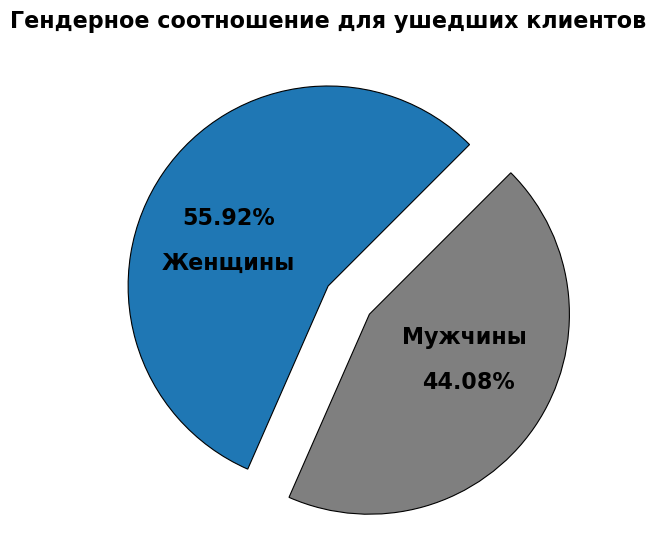

In [7]:
# 9.6 Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.
gender_df = churn_data[churn_data['Exited'] == 1].groupby(by='Gender')['Exited'].count()
# Задаём фигуру и оси 
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([1, 1, 1, 1])
# Задаём заголовок
axes.set_title('Гендерное соотношение для ушедших клиентов', fontweight='bold', fontsize=16)
# Строим график
axes.pie(
    gender_df,
    labels=('Женщины','Мужчины'),
    colors=('tab:blue','C7'),
    autopct='%.2f%%',
    explode=(0, 0.25),
    labeldistance=0.2,
    wedgeprops={'lw':0.8,'edgecolor':'k'},
    textprops={'fontweight':'semibold', 'fontsize':16},
    startangle=45    
);

<a class="anchor" id=6></a>
Из графика можно сделать вывод, что: 
- Гендерное соотношение для ушедших клиентов практически равное, хотя есть небольшой перевес в сторону женщин (6%).

Принимая во внимание данные из предыдущих графиков, можно сделать вывод: **банк теряет состоятельных женщин 40+.**

[к заданиям](#0)

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: Exited, dtype: int64

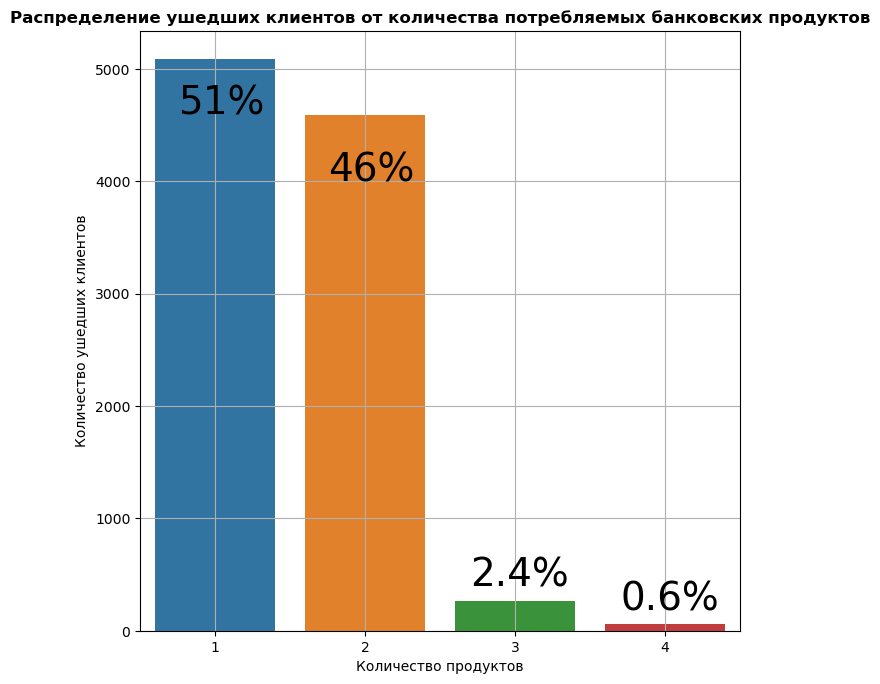

In [8]:
# 9.7 Как отток клиентов зависит от числа приобретённых у банка услуг? 
# Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.
bar_df = churn_data.groupby(by='NumOfProducts')['Exited'].count()
fig = plt.figure(figsize=(6, 6))
axes = fig.add_axes([0, 0, 1, 1])
barplot = sns.barplot(
    x=bar_df.index,
    y=bar_df.values,      
)
display(bar_df)
barplot.set_title('Распределение ушедших клиентов от количества потребляемых банковских продуктов', fontweight='semibold')
barplot.set_xlabel('Количество продуктов')
barplot.grid()
barplot.text(-0.25, 4600, '51%',fontsize=28),
barplot.text(0.75, 4000, '46%',fontsize=28),
barplot.text(1.7, 400, '2.4%',fontsize=28),
barplot.text(2.7, 180, '0.6%',fontsize=28),
barplot.set_ylabel('Количество ушедших клиентов');

<a class="anchor" id=7></a>
Из графика можно сделать вывод, что: 
- **Подавляющее большинство** ушедших клиентов пользовались одним **(51%)** или двумя **(46%)** продуктами банка.
- Суммарноя доля ушедших клиентов, использовавших более двух продуктов банка составляет 3%.
Закономерность очевидна и интуитивно понятна, если ты пользуешься несколькими услугами банка (счёт, кредит, страховка, инвестиции и т.п.) значит во-первых тебя как клиента скорее всё устраивает, во-вторых процедура перехода из одного банка в другой для тебя кратно усложняется.

Принимая во внимание информацию о количестве счетов с нулевым балансом, можно предположить: многие ушедшие клиенты так и **не стали активными клиентами банка**. Закрыли кредит и ушли, либо открыли счёт но не совершали транзакций по нему.

[к заданиям](#0)

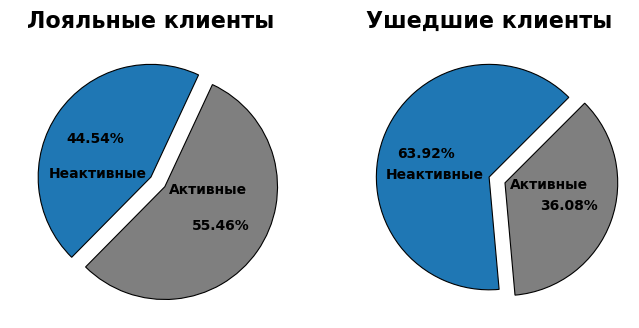

In [9]:
# 9.8 Как влияет наличие статуса активного клиента на отток клиентов? 
# Постройте диаграмму, иллюстрирующую это. 
# Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?
active_df = churn_data.pivot_table(
    values='CustomerId',
    index='IsActiveMember',
    columns='Exited',
    aggfunc='count'
)
"""active_df = active_df.rename(index={0:'Неактивные',1:'Активные'})
active_df = active_df.rename(columns={0:'Лояльные',1:'Ушедшие'})

fig = px.bar(
    data_frame=active_df,
    x=active_df.index, 
    y=active_df.columns,
    title='Распределение лояльных и ушедших киентов от статуса активности'
)
fig.show()

active_df = churn_data.pivot_table(
    values='CustomerId',
    index='IsActiveMember',
    columns='Exited',
    aggfunc='count'
)"""
active_df = active_df.rename(index={0:'Неактивные',1:'Активные'})
active_df = active_df.rename(columns={0:'Лояльные',1:'Ушедшие'})

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

axes[0].pie(    
    active_df['Лояльные'],
    labels=('Неактивные','Активные'),
    colors=('tab:blue','C7'),
    autopct='%.2f%%',
    explode=(0, 0.15),
    labeldistance=0.05,
    wedgeprops={'lw':0.8,'edgecolor':'k'},
    textprops={'fontweight':'semibold', 'fontsize':10},
    startangle=65
)
axes[0].set_title('Лояльные клиенты', fontweight='bold', fontsize=16)
axes[1].pie(    
    active_df['Ушедшие'],
    labels=('Неактивные','Активные'),
    colors=('tab:blue','C7'),
    autopct='%.2f%%',
    explode=(0, 0.15),
    labeldistance=0.05,
    wedgeprops={'lw':0.8,'edgecolor':'k'},
    textprops={'fontweight':'semibold', 'fontsize':10},
    startangle=45,
)
axes[1].set_title('Ушедшие клиенты', fontweight='bold', fontsize=16);

<a class="anchor" id=8></a>
Из графика можно сделать вывод, что: 
- Среди ушедших клиентов преобладают неактивные клиенты они уходят в **полтора раза чаще** активных.
- Среди лояльных клиентов такой закономерности не наблюдается, клиенты делятся на активных и неактивных примерно в **равных долях.**
- Неактивные лояльные клиенты это **потенциальные кандидаты на уход**.

Принимая во внимание информацию о потреблении банковских продуктов можно посоветовать банку интенсифицировать работу по повышении активности клиентов за счет увеличении потребляемых клиентами банковских продуктов.

[к заданиям](#0)

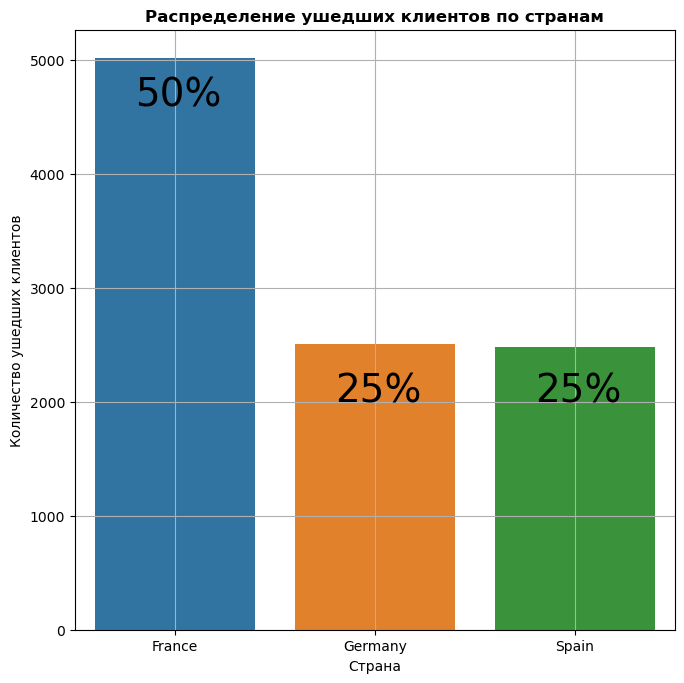

In [10]:
# 9.9. В какой стране доля ушедших клиентов больше? 
# Постройте тепловую картограмму, которая покажет это соотношение на карте мира. 
# Предположите, с чем это может быть связано.
geo_df = churn_data.groupby(by='Geography')['Exited'].count()
fig = plt.figure(figsize=(6, 6))
axes = fig.add_axes([0, 0, 1, 1])
barplot = sns.barplot(
    x=geo_df.index,
    y=geo_df.values,      
)
barplot.set_title('Распределение ушедших клиентов по странам', fontweight='semibold')
barplot.set_xlabel('Страна')
barplot.grid()
barplot.text(-0.2, 4600, '50%',fontsize=28),
barplot.text(0.8, 2000, '25%',fontsize=28),
barplot.text(1.8, 2000, '25%',fontsize=28),
barplot.set_ylabel('Количество ушедших клиентов');

<a class="anchor" id=9></a>
Из графика можно сделать вывод, что: 
- **Ровно половина** ушедших клиентов из Франции.
- Вторая половина ушедших клиентов **поровну делится** на клиентов немецкого и испанского филиалов.

Следует внимательнее рассмотреть работу французкого филиала в разрезе удержания клиентов.

[к заданиям](#0)

Tenure,0,1,2,3,4,5,6,7,8,9,10
CreditScoreCat,,,,,,,,,,,
Excellent,0.275000,0.208333,0.137255,0.168317,0.131868,0.233333,0.241379,0.127660,0.196078,0.270833,0.254902
Fair,0.217391,0.215596,0.213043,0.216450,0.197248,0.206897,0.236364,0.171103,0.209016,0.190045,0.205357
Good,0.203822,0.203608,0.187342,0.205962,0.195122,0.214470,0.182857,0.191892,0.152355,0.194667,0.197802
Poor,0.226415,0.259398,0.211765,0.212245,0.233202,0.199153,0.179916,0.151261,0.214575,0.251082,0.169492
Very_Poor,0.444444,0.253731,0.151515,0.285714,0.293103,0.149254,0.225352,0.206349,0.253521,0.229508,0.333333


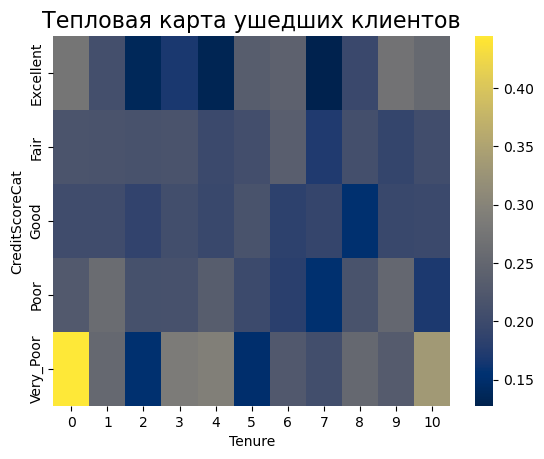

In [11]:
# 9.10 Переведите числовой признак CreditScore в категориальный. 
# Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. 
# Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.
# Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), 
# а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). 
# В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.
# На основе полученной сводной таблицы постройте тепловую карту с аннотацией. 
# Найдите на тепловой карте категории клиентов, которые уходят чаще всего.
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
    
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)
heat_df = churn_data.pivot_table(
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure',
    aggfunc='mean'
)
display(heat_df)
heatmap = sns.heatmap(data=heat_df, cmap='cividis')
heatmap.set_title('Тепловая карта ушедших клиентов', fontsize=16);

<a class="anchor" id=10></a>
Из графика можно сделать вывод, что: 
- Чаще всего уходили клиенты с очень **низким кредитным рейтингом**, которые пользовавались услугами банка **менее 1 года**.

### Тезисы по всем графикам:
1. Уже 20% клиентов ушли
2. Есть деньги - есть нормально распределение
3. Уходят богатые
4. Уходят богатые 40+
5. Предполагаемый уровень дохода - мусор
6. Уходят богатые женщины 40+
7. 3 и более продуктов гарантируют лояльность
8. Неактивные первые в очереди на уход
9. Французы плохо держат клиентов
10. Низкий кретиный рейтинг - всех печалит


[к заданиям](#0)